## Обробка та аналіз БМД
  
**Лабораторна робота №6**  
**Парний t-критерій Стьюдента**  
виконала студентка групи БС-81  
Соловйова Анастасія

In [1]:
from numpy.random import randint
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [2]:
group1 = randint(20, 60, 8)
group2 = randint(20, 60, 8)

df = pd.DataFrame({
    "Глядацький зал 1": group1, 
    "Глядацький зал 2": group2,
    }, index = ["9:00 - 11:00", "11:00 - 13:00","13:00 - 15:00", "15:00 - 17:00", "17:00 - 19:00", "19:00 - 21:00", "21:00 - 23:00", "23:00 - 01:00"])

df.index.name = 'Сеанс'
df.columns.name = 'Кількість глядачів'
df

Кількість глядачів,Глядацький зал 1,Глядацький зал 2
Сеанс,,
9:00 - 11:00,26,38
11:00 - 13:00,40,23
13:00 - 15:00,29,53
15:00 - 17:00,52,55
17:00 - 19:00,21,36
19:00 - 21:00,50,37
21:00 - 23:00,48,26
23:00 - 01:00,43,37


2. Побудувати графік, що відображає розкид даних в групах.

[]

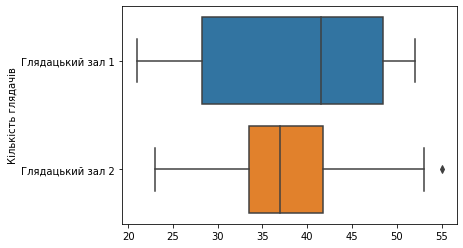

In [3]:
sns.boxplot(data = df, orient = 'h').set()


3.Написати функції:
- для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

- для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def Pirson(x, y):
    n = len(x)
    r = ( sum(x * y) - n * (sum(x)/n) * (sum(y)/n) ) / ( n * ( ( ( sum(x**2)/n - (sum(x)/n)**2 ) * ( sum(y**2)/n - (sum(y)/n)**2) ) )**(1/2) )
    print("Значення коефіцієнту кореляції: " + str(r))
    
    df = n - 2
    print("Значення ступеня свободи: " + str(df))
    
    read = pd.read_excel("CriticalTable.xlsx")
    table = read.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту кореляції = " + str(table))
    
    if abs(r) > table:
        result = "significant"
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
    
    return r, df, result

In [5]:
def Student(x, y):
    d = x - y
    n = len(x)
    M = d.mean()
    sigma = d.std()
    t = (M/sigma) * (n)**(1/2)
    print("Значення t-критерію Стьюдента: t = "  + str(t))
    
    df = n - 1
    print('Значення ступеня свободи: df = ' + str(df))
    
    read = pd.read_excel("CriticalTable.xlsx")
    table = read.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту Стьюдента = " + str(table))
    
    if abs(t) > table:
        result = "significant"
        print("Результат оцінки значимості зв'зку: " + result)
    else:
        result = "not significant"
        print("Результат оцінки значимості зв'зку: " + result)
    
    return t, df, result

4. Перевірити розбіжність на між групами на даних з п. 1.

In [6]:
Pirson(group1, group2)

Значення коефіцієнту кореляції: -0.03281484920114887
Значення ступеня свободи: 6
Критичне значення коефіцієнту кореляції = 2.447
Результат оцінки значимості зв'зку: not significant


(-0.03281484920114887, 6, 'not significant')

In [7]:
Student(group1, group2)

Значення t-критерію Стьюдента: t = 0.0910502907211971
Значення ступеня свободи: df = 7
Критичне значення коефіцієнту Стьюдента = 2.365
Результат оцінки значимості зв'зку: not significant


(0.0910502907211971, 7, 'not significant')

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.  

### Висновок###  
-  Під час аналізу двох груп на залежність між собою було отримано результат, що довзволяє припустити, що статистичної залежності немає.  

- Під час аналізу на перевірку відмінності між групами з допомогою розрахунку критерію t-Стьюдента була прийнята альтернативна гіпотеза про відмінність середніх
